# MY PROJECT 
Forest Fire in Bejaia Region and Sidi-Bel Abbes Region

Data of two regions of Algeria: 
1) the Bejaia region located in the northeast of Algeria ; 2) the Sidi Bel-abbes region located in the northwest of Algeria.

- Date: From June to December in 2012 
- Temperature in Celsius degrees
- RH: Relative Humidity in %
- Ws: Wind Speed in km/h
- Rain: total per day in mm
- Classes : Fire or Not Fire


-Fine Fuel Moisture Code (FFMC) index 
-Duff Moisture Code (DMC) index 
-Drought Code (DC) index 
-Initial Spread Index (ISI) index 
-Buildup Index (BUI) index 
-Fire Weather Index (FWI) index

- Source of Dataset : UCI Machine Learning Repository from"https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++"

In [45]:
# Import the modules and libraries
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
#To combine the data of two csv files into one dateframe. Both csv files have the same parameter, only different region.

forest_f = sorted(glob('Algerian_forest_fires_*.csv'))
forest_f

['Algerian_forest_fires_Bejaia Region.csv',
 'Algerian_forest_fires_Sidi-Bel Abbes Region.csv']

In [3]:
# Try to merge two csv files into one dataframe.

forest_fires = pd.concat((pd.read_csv(file).assign(Regions = file)
                   for file in forest_f), ignore_index = True)
forest_fires

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Algerian_forest_fires_Bejaia Region.csv
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Algerian_forest_fires_Bejaia Region.csv
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Algerian_forest_fires_Bejaia Region.csv
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Algerian_forest_fires_Bejaia Region.csv
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Algerian_forest_fires_Bejaia Region.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Algerian_forest_fires_Sidi-Bel Abbes Region.csv
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Algerian_forest_fires_Sidi-Bel Abbes Region.csv
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Algerian_forest_fires_Sidi-Bel Abbes Region.csv
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Algerian_forest_fires_Sidi-Bel Abbes Region.csv


In [4]:
# Convert the the columns (day, month, year) into one column named 'Date'.
Date = pd.to_datetime(forest_fires[['year', 'month', 'day']])
forest_fires['Date'] = Date
forest_fires

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions,Date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Algerian_forest_fires_Bejaia Region.csv,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Algerian_forest_fires_Bejaia Region.csv,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Algerian_forest_fires_Bejaia Region.csv,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Algerian_forest_fires_Bejaia Region.csv,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Algerian_forest_fires_Bejaia Region.csv,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Algerian_forest_fires_Sidi-Bel Abbes Region.csv,2012-09-26
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Algerian_forest_fires_Sidi-Bel Abbes Region.csv,2012-09-27
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Algerian_forest_fires_Sidi-Bel Abbes Region.csv,2012-09-28
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Algerian_forest_fires_Sidi-Bel Abbes Region.csv,2012-09-29


In [5]:
# Replace the auto-generated index with the "Regions" column
forest_fires.set_index('Date', inplace=True)

In [6]:
# Rename the string value in the column 'Regions'.
forest_fires['Regions'] = forest_fires['Regions'].map({'Algerian_forest_fires_Bejaia Region.csv':'Bejaia Region', 'Algerian_forest_fires_Sidi-Bel Abbes Region.csv':'Sidi-Bel Abbes Region'})

In [7]:
forest_fires['Regions']

Date
2012-06-01            Bejaia Region
2012-06-02            Bejaia Region
2012-06-03            Bejaia Region
2012-06-04            Bejaia Region
2012-06-05            Bejaia Region
                      ...          
2012-09-26    Sidi-Bel Abbes Region
2012-09-27    Sidi-Bel Abbes Region
2012-09-28    Sidi-Bel Abbes Region
2012-09-29    Sidi-Bel Abbes Region
2012-09-30    Sidi-Bel Abbes Region
Name: Regions, Length: 244, dtype: object

In [8]:
# Create a new dataframe for the analysis
forest_fires[['Regions', 'Temperature', ' RH', ' Ws', 'Rain ', 'Classes  ']]

,Regions,Temperature,RH,Ws,Rain,Classes
Date,,,,,,
2012-06-01,Bejaia Region,29,57,18,0.0,not fire
2012-06-02,Bejaia Region,29,61,13,1.3,not fire
2012-06-03,Bejaia Region,26,82,22,13.1,not fire
2012-06-04,Bejaia Region,25,89,13,2.5,not fire
2012-06-05,Bejaia Region,27,77,16,0.0,not fire
...,...,...,...,...,...,...
2012-09-26,Sidi-Bel Abbes Region,30,65,14,0.0,fire
2012-09-27,Sidi-Bel Abbes Region,28,87,15,4.4,not fire
2012-09-28,Sidi-Bel Abbes Region,27,87,29,0.5,not fire


In [9]:
# There are 244 rows and 15 columns in the dataset.
forest_fires.shape

(244, 15)

In [10]:
# Check the data information of the dataset.
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2012-06-01 to 2012-09-30
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Regions      244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 30.5+ KB


In [11]:
# To find out the unique data in the column 'Regions'.
forest_fires['Regions'].unique()

array(['Bejaia Region', 'Sidi-Bel Abbes Region'], dtype=object)

In [12]:
# To identify the number of each unique data.
forest_fires['Regions'].value_counts()

Sidi-Bel Abbes Region    122
Bejaia Region            122
Name: Regions, dtype: int64

In [13]:
# To identify the index in the dataset.
forest_fires.index

DatetimeIndex(['2012-06-01', '2012-06-02', '2012-06-03', '2012-06-04',
               '2012-06-05', '2012-06-06', '2012-06-07', '2012-06-08',
               '2012-06-09', '2012-06-10',
               ...
               '2012-09-21', '2012-09-22', '2012-09-23', '2012-09-24',
               '2012-09-25', '2012-09-26', '2012-09-27', '2012-09-28',
               '2012-09-29', '2012-09-30'],
              dtype='datetime64[ns]', name='Date', length=244, freq=None)

In [14]:
# To identify any missing data in the dataset.
forest_fires.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Regions        0
dtype: int64

In [15]:
# Identify the mean of each data in 'Bejala Region'.
forest_fires[(forest_fires['Regions'] == 'Bejaia Region')].describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [16]:
# Identify the mean of each data in 'Sidi-Bel Abbes Region'.
forest_fires[(forest_fires['Regions'] == 'Sidi-Bel Abbes Region')].describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,45.415574,5.863934,17.920492,8.520492
std,8.843274,1.115259,0.0,3.675608,15.716186,2.692186,1.486759,12.244064,12.995068,42.927562,4.803667,13.870785,8.137424
min,1.000000,6.000000,2012.0,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,7.300000,0.100000,1.400000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,43.250000,14.000000,0.000000,77.650000,7.325000,14.700000,1.825000,7.400000,0.925000
50%,16.000000,7.500000,2012.0,34.000000,56.000000,15.000000,0.000000,84.850000,13.150000,31.500000,4.600000,13.900000,6.050000
75%,23.000000,8.000000,2012.0,36.000000,66.750000,16.750000,0.475000,89.275000,22.900000,56.975000,8.625000,23.875000,13.650000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,177.300000,19.000000,68.000000,31.100000


In [17]:
# The sort out the data based on the range of index/date.
forest_fires.loc['2012-06-01':'2012-06-30'].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions
Date,,,,,,,,,,,,,,,
2012-06-01,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region
2012-06-02,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region
2012-06-03,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region
2012-06-04,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia Region
2012-06-05,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region


In [18]:
forest_fires['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [19]:
forest_fires.loc['2012-06-01':'2012-09-30']['Classes  '].value_counts()

fire             132
not fire         101
fire               4
not fire           2
fire               2
not fire           1
not fire           1
not fire           1
Name: Classes  , dtype: int64

In [20]:
# Rename the string value in the column 'Classes'.
forest_fires['Classes  '] = forest_fires['Classes  '].map({'not fire   ':'Not fire', 'fire   ':'Fire', 'fire':'Fire',
                                                           'fire ':'Fire', 'not fire':'Not fire', 'not fire ':'Not fire', 
                                                           'not fire     ':'Not fire', 'not fire    ':'Not fire'})                                                        

In [21]:
forest_fires.loc['2012-06-01':'2012-09-30']['Classes  '].value_counts()

Fire        138
Not fire    106
Name: Classes  , dtype: int64

In [22]:
# Group by Classes, giving the count of the forest fire cases
forest_fires[['Regions', 'Classes  ']].groupby(by=['Regions', 'Classes  ']).count()

Empty DataFrame
Columns: []
Index: [(Bejaia Region, Fire), (Bejaia Region, Not fire), (Sidi-Bel Abbes Region, Fire), (Sidi-Bel Abbes Region, Not fire)]

In [23]:
# Showing the days of forest fire in both regions, also checking the NAN data in the same time.
forest_fires.fillna(value={'Classes  ': 'x'}).groupby(by=['Regions', 'Classes  ']).count()

day  month  year  Temperature   RH   Ws  \
Regions               Classes                                              
Bejaia Region         Fire        59     59    59           59   59   59   
                      Not fire    63     63    63           63   63   63   
Sidi-Bel Abbes Region Fire        79     79    79           79   79   79   
                      Not fire    43     43    43           43   43   43   

                                 Rain   FFMC  DMC  DC  ISI  BUI  FWI  
Regions               Classes                                         
Bejaia Region         Fire          59    59   59  59   59   59   59  
                      Not fire      63    63   63  63   63   63   63  
Sidi-Bel Abbes Region Fire          79    79   79  79   79   79   79  
                      Not fire      43    43   43  43   43   43   43

In [24]:
forest_fires.fillna(value={'Classes  ': 'x'}).groupby(by=['Regions', 'Classes  ']).mean()

day     month    year  Temperature  \
Regions               Classes                                               
Bejaia Region         Fire       18.542373  7.423729  2012.0    32.881356   
                      Not fire   13.142857  7.571429  2012.0    29.587302   
Sidi-Bel Abbes Region Fire       16.392405  7.594937  2012.0    34.518987   
                      Not fire   14.581395  7.325581  2012.0    30.674419   

                                        RH         Ws     Rain        FFMC  \
Regions               Classes                                                
Bejaia Region         Fire       63.644068  15.644068  0.013559  86.579661   
                      Not fire   72.031746  16.333333  1.619048  63.522222   
Sidi-Bel Abbes Region Fire       50.772152  15.113924  0.159494  88.265823   
                      Not fire   65.325581  14.813953  1.632558  67.941860   

                                       DMC         DC       ISI        BUI  \
Regions               Classes                                                
Bejaia Region         Fire       19.472881  84.516949  6.242373  24.550847   
                      Not fire    5.611111  23.795238  1.233333   6.880952   
Sidi-Bel Abbes Region Fire       22.127848  59.873418  8.325316  23.473418   
                      Not fire    7.669767  18.853488  1.341860   7.718605   

                                       FWI  
Regions               Classes               
Bejaia Region         Fire       10.537288  
                      Not fire    0.933333  
Sidi-Bel Abbes Region Fire       12.608861  
                      Not fire    1.009302

In [25]:
forest_fires[['Regions', 'Classes  ']].groupby('Regions').count()

,Classes
Regions,
Bejaia Region,122
Sidi-Bel Abbes Region,122


In [26]:
forest_fires[(forest_fires['Regions'] == 'Bejaia Region')]['Classes  '].value_counts()

Not fire    63
Fire        59
Name: Classes  , dtype: int64

In [27]:
forest_fires[(forest_fires['Regions'] == 'Sidi-Bel Abbes Region')]['Classes  '].value_counts()

Fire        79
Not fire    43
Name: Classes  , dtype: int64

In [28]:
forest_fires[(forest_fires['Regions'] == 'Bejaia Region')]['Classes  ']

Date
2012-06-01    Not fire
2012-06-02    Not fire
2012-06-03    Not fire
2012-06-04    Not fire
2012-06-05    Not fire
                ...   
2012-09-26    Not fire
2012-09-27        Fire
2012-09-28    Not fire
2012-09-29    Not fire
2012-09-30    Not fire
Name: Classes  , Length: 122, dtype: object

## Forest Fire Cases 

In [29]:
# The data was calculated based on the tables.
raw_data = {'month':['6', '6', '7', '7', '8', '8', '9', '9'],
            'region':['Bejaia Region', 'Sidi-Bel Abbes Region', 'Bejaia Region', 'Sidi-Bel Abbes Region', 'Bejaia Region', 'Sidi-Bel Abbes Region', 'Bejaia Region', 'Sidi-Bel Abbes Region'],
            'fire_cases':[13, 12 ,15, 24 ,24, 27 , 7, 16]}


In [30]:
# A new dateframe of fire cases in both regions from June - September 2012 was created.
cases = pd.DataFrame(raw_data, columns=['month', 'region', 'fire_cases'])
cases.head(10)

,month,region,fire_cases
0,6,Bejaia Region,13
1,6,Sidi-Bel Abbes Region,12
2,7,Bejaia Region,15
3,7,Sidi-Bel Abbes Region,24
4,8,Bejaia Region,24
5,8,Sidi-Bel Abbes Region,27
6,9,Bejaia Region,7
7,9,Sidi-Bel Abbes Region,16


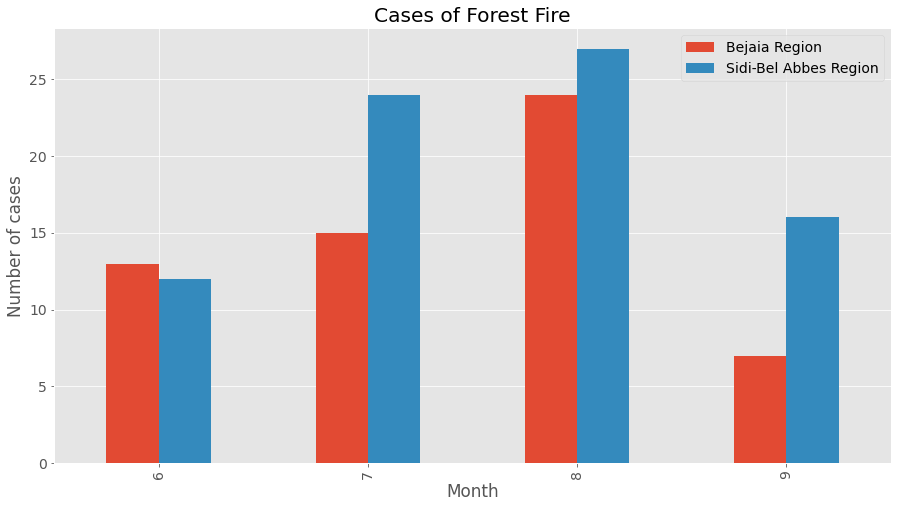

In [31]:
# A grouped bar chart was plotted.
cases.pivot(index='month', columns='region', values='fire_cases').plot(kind='bar', figsize=(15,8))

plt.xlabel('Month')
plt.ylabel('Number of cases')
plt.title('Cases of Forest Fire')
plt.legend(loc='upper right')
plt.show()

## Line Graph of Temperature

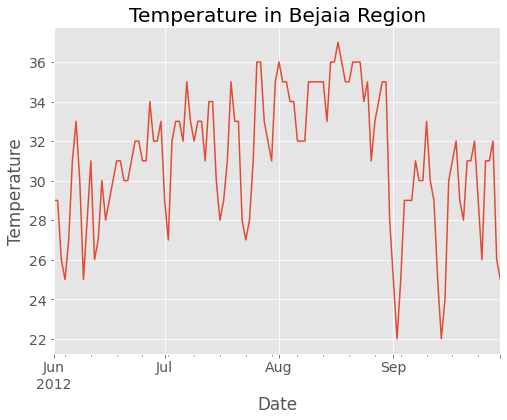

In [32]:
#The temperature in Bejaia Region. (Linegraph)
forest_fires[(forest_fires['Regions']=='Bejaia Region')]['Temperature'].plot() 

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature in Bejaia Region')
plt.show()

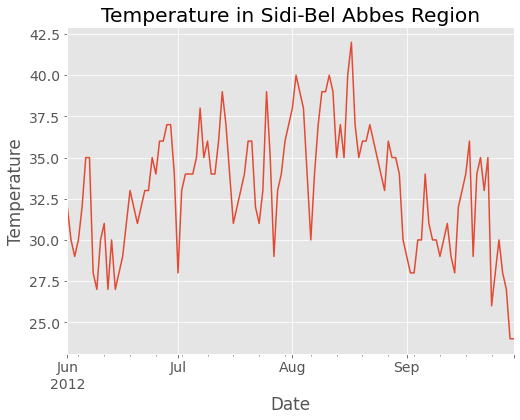

In [33]:
# The temperature in Sidi-Bel Abbes Region. (Linegraph)  
forest_fires[(forest_fires['Regions']!='Bejaia Region')]['Temperature'].plot()

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature in Sidi-Bel Abbes Region')
plt.show()

In [47]:
# Identify the Highest temperature.
#forest_fires[(forest_fires['Regions']=='Sidi-Bel Abbes Region')]['Temperature'].max()
forest_fires[(forest_fires['Regions']=='Bejaia Region')]['Temperature'].max()

37

In [35]:
# Identify the lowest temperature.
#forest_fires[(forest_fires['Regions']=='Sidi-Bel Abbes Region')]['Temperature'].min()
forest_fires[(forest_fires['Regions']=='Bejaia Region')]['Temperature'].min()

22

## Scatter Matrix and plots

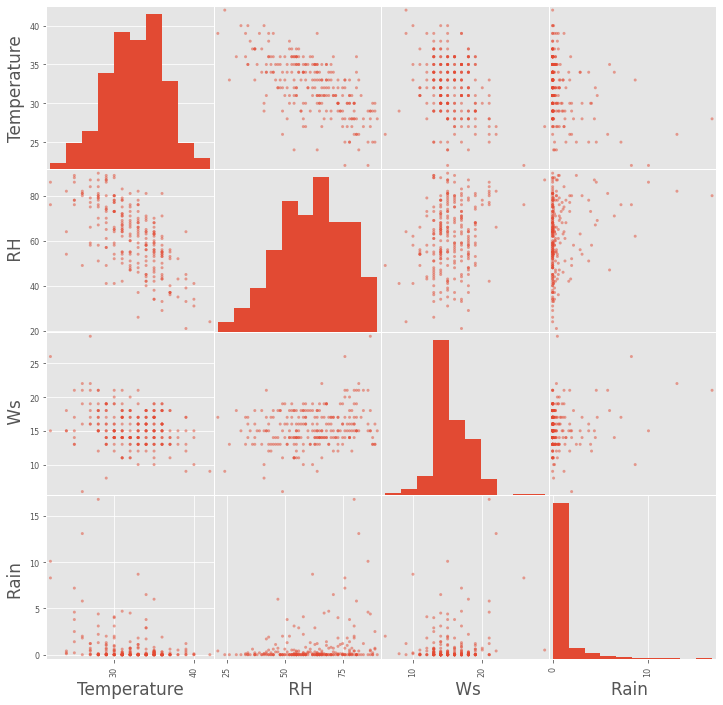

In [36]:
# Scatter Matrix - Plotting 
pd.plotting.scatter_matrix(
    forest_fires.select_dtypes(include = 'number').iloc[:, 3:7],
    figsize = (12,12)
);

<AxesSubplot:xlabel=' RH', ylabel='Temperature'>

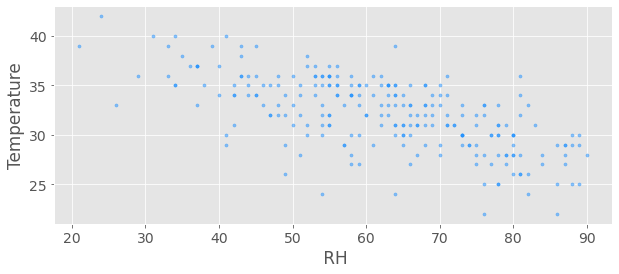

In [37]:
# To compare the relationship between Temperature and Rain Humidity.
forest_fires.plot(kind='scatter', x=' RH', y='Temperature', \
                 color='dodgerblue', figsize=(10,4), s=10, alpha=0.5)

## A function to determine the weather

In [38]:
# A function that determine the weather based on the temperature. 
def forest_status(weather):
    if weather >= 32:
        return 'It was so hot!'
    elif weather >= 28:
        return 'Nice weather!'
    else:
        return 'It was cold!'
    
forest_fires['weather'] = forest_fires['Temperature'].apply(forest_status)
            

In [39]:
forest_fires.head(100)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions,weather
Date,,,,,,,,,,,,,,,,
2012-06-01,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Not fire,Bejaia Region,Nice weather!
2012-06-02,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Not fire,Bejaia Region,Nice weather!
2012-06-03,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Not fire,Bejaia Region,It was cold!
2012-06-04,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Not fire,Bejaia Region,It was cold!
2012-06-05,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Not fire,Bejaia Region,It was cold!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-04,4,9,2012,29,73,17,0.1,68.4,1.9,15.7,1.4,2.9,0.5,Not fire,Bejaia Region,Nice weather!
2012-09-05,5,9,2012,29,75,16,0.0,80.8,3.4,24.0,2.8,5.1,1.7,Fire,Bejaia Region,Nice weather!
2012-09-06,6,9,2012,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0.9,Not fire,Bejaia Region,Nice weather!


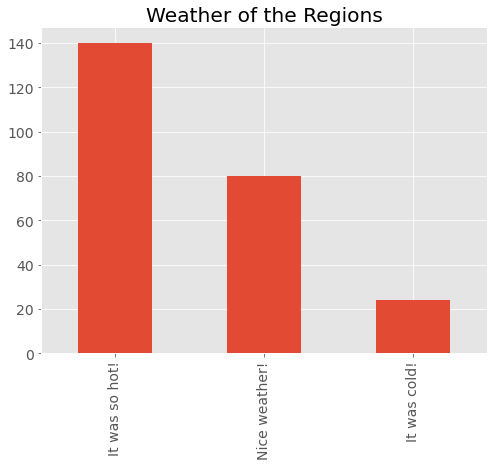

In [40]:
# A bar chart was plotted.
forest_fires['weather'].value_counts().plot(kind='bar')

plt.title('Weather of the Regions')
plt.show()

## Convert a list from the dataframe

In [41]:
# Create lists from the dataframe. (Bejaia Region in June)
list_of_status = forest_fires.iloc[0:30]['Classes  '].tolist()
list_of_temperature = forest_fires.iloc[0:30]['Temperature'].tolist()
list_of_RH = forest_fires.iloc[0:30][' RH'].tolist()

In [42]:
#list_of_status
#list_of_temperature
#list_of_RH

In [43]:
# To show the dictionaries from June 01 to June 30 in Bejaia Region.
forest_data = []

for i in range(len(list_of_temperature)):
    
    current_day = {
        "days": i,
        "temperature": list_of_temperature[i],
        "rain_humudity": list_of_RH[i],
        "forest_status": list_of_status[i]
    }
        
    forest_data.append(current_day)
    
for days in forest_data:
    print(days)

{'days': 0, 'temperature': 29, 'rain_humudity': 57, 'forest_status': 'Not fire'}
{'days': 1, 'temperature': 29, 'rain_humudity': 61, 'forest_status': 'Not fire'}
{'days': 2, 'temperature': 26, 'rain_humudity': 82, 'forest_status': 'Not fire'}
{'days': 3, 'temperature': 25, 'rain_humudity': 89, 'forest_status': 'Not fire'}
{'days': 4, 'temperature': 27, 'rain_humudity': 77, 'forest_status': 'Not fire'}
{'days': 5, 'temperature': 31, 'rain_humudity': 67, 'forest_status': 'Fire'}
{'days': 6, 'temperature': 33, 'rain_humudity': 54, 'forest_status': 'Fire'}
{'days': 7, 'temperature': 30, 'rain_humudity': 73, 'forest_status': 'Fire'}
{'days': 8, 'temperature': 25, 'rain_humudity': 88, 'forest_status': 'Not fire'}
{'days': 9, 'temperature': 28, 'rain_humudity': 79, 'forest_status': 'Not fire'}
{'days': 10, 'temperature': 31, 'rain_humudity': 65, 'forest_status': 'Fire'}
{'days': 11, 'temperature': 26, 'rain_humudity': 81, 'forest_status': 'Fire'}
{'days': 12, 'temperature': 27, 'rain_humudity

In [44]:
# Detect the data.
print(forest_data[26]["forest_status"])
print(forest_data[5]["temperature"])


Fire
31
